## Bagging Ensemble

Bagging consists of two steps:

1. Bootstrapping - Drawing samples randomly from given population .
2. Aggregation - Here the aggreagate function is majority count from all models output (classifier) and mean of all models output (regression)

Key points:

*   All models should be of same algorithm ie. all base models are same.
*   Every model is trained on different data (random sampling).



### Importing Dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

df = pd.read_csv('/content/Iris.csv')

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df.iloc[:,1:]

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
# encoding species column -> assign them numerical values
df['Species'] = encoder.fit_transform(df['Species'])

In [ ]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
# convertibg into binary classification problem therefore removing some columns -> setora(species)
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [ ]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


### Vistualization

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

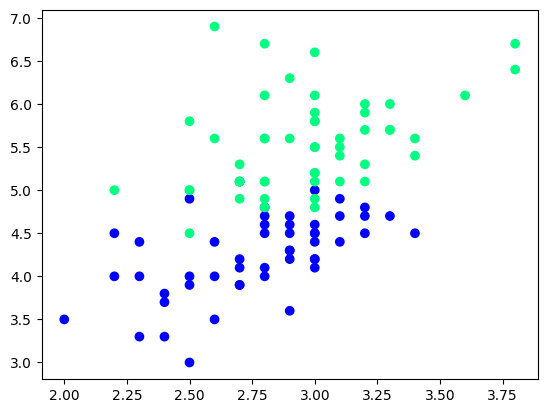

In [ ]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')

In [ ]:
# Taking only 10 rows for training
# sufling the dataset and dividing it into train , test ,valid
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [ ]:
df_train

,SepalWidthCm,PetalLengthCm,Species
149,3.0,5.1,2
54,2.8,4.6,1
75,3.0,4.4,1
103,2.9,5.6,2
139,3.1,5.4,2
66,3.0,4.5,1
119,2.2,5.0,2
56,3.3,4.7,1
76,2.8,4.8,1
143,3.2,5.9,2


In [ ]:
df_test

,SepalWidthCm,PetalLengthCm,Species
120,3.2,5.7,2
89,2.5,4.0,1
113,2.5,5.0,2
142,2.7,5.1,2
52,3.1,4.9,1


In [ ]:
df_val

,SepalWidthCm,PetalLengthCm,Species
141,3.1,5.1,2
58,2.9,4.6,1
121,2.8,4.9,2
86,3.1,4.7,1
147,3.0,5.2,2


In [ ]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [ ]:
X_test

array([[3.1, 5.1],
       [2.9, 4.6],
       [2.8, 4.9],
       [3.1, 4.7],
       [3. , 5.2]])

In [ ]:
y_test

array([2, 1, 2, 1, 2])

### Case 1 - Bagging

Bagging is an ensemble learning technique that trains multiple models on randomly drawn subsets of the training data with replacement (bootstrap sampling). It is based on row sampling with replacement

In [ ]:
# Data for Tree 1
# taking over all smaple(train) from that 80 percent is given to each tree
# one row can come multiple times therefore replace= TRUE
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
143,3.2,5.9,2
119,2.2,5.0,2
75,3.0,4.4,1
103,2.9,5.6,2
76,2.8,4.8,1
75,3.0,4.4,1
56,3.3,4.7,1


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [ ]:
dt_bag1 = DecisionTreeClassifier()

In [ ]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

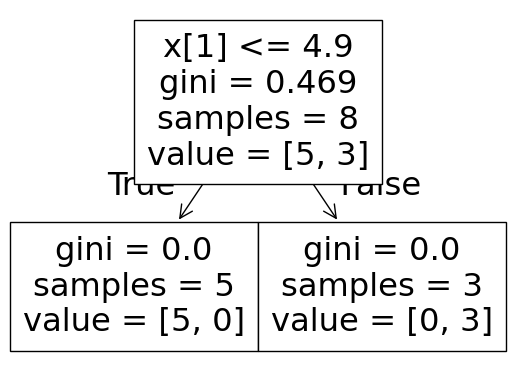

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


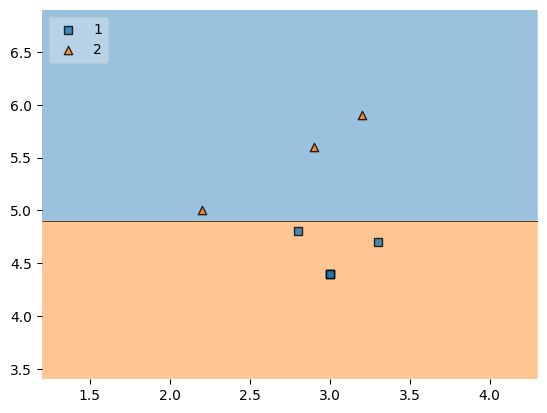

In [ ]:
evaluate(dt_bag1,X,y)

In [ ]:
# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
143,3.2,5.9,2
75,3.0,4.4,1
56,3.3,4.7,1
66,3.0,4.5,1
149,3.0,5.1,2
76,2.8,4.8,1
56,3.3,4.7,1
149,3.0,5.1,2


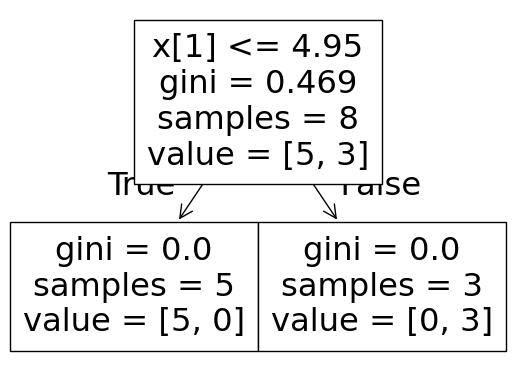

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


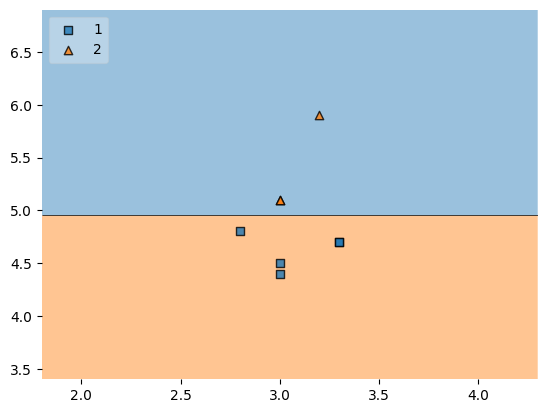

In [ ]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [ ]:
# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
56,3.3,4.7,1
76,2.8,4.8,1
143,3.2,5.9,2
119,2.2,5.0,2
54,2.8,4.6,1
75,3.0,4.4,1
66,3.0,4.5,1
103,2.9,5.6,2


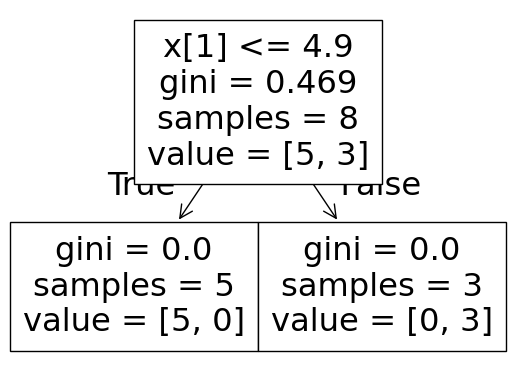

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


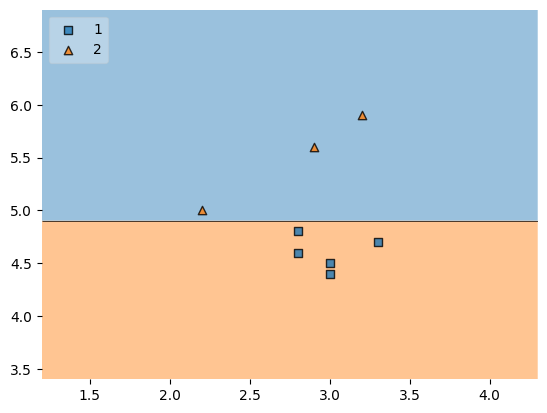

In [ ]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

### Predict

In [ ]:
# df_test to check while prediction
df_test

,SepalWidthCm,PetalLengthCm,Species
120,3.2,5.7,2
89,2.5,4.0,1
113,2.5,5.0,2
142,2.7,5.1,2
52,3.1,4.9,1


In [ ]:
print("Predictor 1",dt_bag1.predict(np.array([3.2,5.7]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.2,5.7]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.2,5.7]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Predictor 1",dt_bag1.predict(np.array([2.7,5.1]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.7,5.1]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.7,5.1]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [2]
Predictor 3 [2]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### Case 2 - Pasting

Similar to bagging, but the key difference is that pasting does not use replacement when drawing subsets of the training data. It is based on row sampliing without replacement.

In [ ]:
# Row sampling without replacement
df_train

,SepalWidthCm,PetalLengthCm,Species
149,3.0,5.1,2
54,2.8,4.6,1
75,3.0,4.4,1
103,2.9,5.6,2
139,3.1,5.4,2
66,3.0,4.5,1
119,2.2,5.0,2
56,3.3,4.7,1
76,2.8,4.8,1
143,3.2,5.9,2


In [ ]:
df_train.sample(8) # replace is False

,SepalWidthCm,PetalLengthCm,Species
149,3.0,5.1,2
103,2.9,5.6,2
119,2.2,5.0,2
66,3.0,4.5,1
54,2.8,4.6,1
76,2.8,4.8,1
139,3.1,5.4,2
143,3.2,5.9,2


### Case 3 - Random Subspaces

 Instead of sampling instances (like in bagging and pasting), random subspaces sample features (columns) of the dataset, training each model on different feature subsets.It is based on column/feature sampling with or without replacement , typically without replacement.

In [ ]:
df1 = pd.read_csv('/content/Iris.csv')
df1 = df1.sample(10)

In [ ]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
20,21,5.4,3.4,1.7,0.2,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
16,17,5.4,3.9,1.3,0.4,Iris-setosa
116,117,6.5,3.0,5.5,1.8,Iris-virginica
28,29,5.2,3.4,1.4,0.2,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [ ]:
df1.sample(2,replace=True,axis=1) # any 2 columns , axis = 1 ( indicates column sampling)

,SepalWidthCm,SepalLengthCm
64,2.9,5.6
20,3.4,5.4
48,3.7,5.3
16,3.9,5.4
116,3.0,6.5
28,3.4,5.2
118,2.6,7.7
149,3.0,5.9
38,3.0,4.4
100,3.3,6.3


### Case 4 - Random Patches

Random Patches is a combination of Bagging (row sampling) and Random Subspaces (feature sampling). In this method, both data instances (rows) and features (columns) are randomly sampled to train different models.

In [ ]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
64,65,5.6,2.9,3.6,1.3,Iris-versicolor
20,21,5.4,3.4,1.7,0.2,Iris-setosa
48,49,5.3,3.7,1.5,0.2,Iris-setosa
16,17,5.4,3.9,1.3,0.4,Iris-setosa
116,117,6.5,3.0,5.5,1.8,Iris-virginica
28,29,5.2,3.4,1.4,0.2,Iris-setosa
118,119,7.7,2.6,6.9,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica
38,39,4.4,3.0,1.3,0.2,Iris-setosa
100,101,6.3,3.3,6.0,2.5,Iris-virginica


In [ ]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1) # 8 rows with replacement and in that 2 columns

,SepalWidthCm,SepalWidthCm
118,2.6,2.6
116,3.0,3.0
16,3.9,3.9
64,2.9,2.9
38,3.0,3.0
20,3.4,3.4
28,3.4,3.4
28,3.4,3.4
